# 從股票學python

In [1]:
import pandas as pd 
import sqlite3 

In [2]:
con = sqlite3.connect('../tw_stock.db')

In [3]:
df_stock = pd.read_sql('select * from TPEx_list_daily_price where 證券代號="2330"',con)

In [4]:
df_stock.head()

,證券代號,yyyymmdd,成交量,成交筆數,開盤價,最高價,最低價,收盤價,本益比
0,2330,2018-01-03 00:00:00,31706.091,13633,236.0,238.0,235.5,237.0,17.86
1,2330,2018-01-02 00:00:00,18055.269,9954,231.5,232.5,231.0,232.5,17.52
2,2330,2017-12-29 00:00:00,25610.443,8325,227.5,230.0,226.5,229.5,17.29
3,2330,2017-12-28 00:00:00,24370.371,7413,226.5,228.0,225.0,226.0,17.03
4,2330,2017-12-27 00:00:00,12515.245,5717,225.0,226.0,225.0,225.0,16.96


In [5]:
df_stock['yyyymmdd'] = pd.to_datetime(df_stock['yyyymmdd'])

In [6]:
df_stock.dtypes

證券代號                object
yyyymmdd    datetime64[ns]
成交量                float64
成交筆數                 int64
開盤價                float64
最高價                float64
最低價                float64
收盤價                float64
本益比                float64
dtype: object

## namedtuple

In [73]:
date_array = df_stock['yyyymmdd'].sort_values()
price_array = df_stock['收盤價'][::-1]

In [58]:
# date_array = ['20170118','20170119','20170120','20170121','20170122']
# price_array = ['30.14','29.58','26.36','32.56','32.82']

In [67]:
from collections import namedtuple
stock_namedtuple = namedtuple('stock',('date','price'))

In [68]:
stock_namedtuple

__main__.stock

In [61]:
stock_namedtuple_list = [stock_namedtuple(date,price) for date,price 
                        in zip(date_array,price_array)]

In [62]:
# namedtuple()

# dict

In [63]:
stock_dict = {
    date:price for date,price in zip(date_array,price_array)
}

In [64]:
stock_dict

{Timestamp('2018-01-03 00:00:00'): 237.0,
 Timestamp('2018-01-02 00:00:00'): 232.5,
 Timestamp('2017-12-29 00:00:00'): 229.5,
 Timestamp('2017-12-28 00:00:00'): 226.0,
 Timestamp('2017-12-27 00:00:00'): 225.0,
 Timestamp('2017-12-26 00:00:00'): 226.0,
 Timestamp('2017-12-25 00:00:00'): 228.5,
 Timestamp('2017-12-22 00:00:00'): 227.5,
 Timestamp('2017-12-21 00:00:00'): 225.0,
 Timestamp('2017-12-20 00:00:00'): 224.5,
 Timestamp('2017-12-19 00:00:00'): 225.0,
 Timestamp('2017-12-18 00:00:00'): 227.0,
 Timestamp('2017-12-15 00:00:00'): 230.0,
 Timestamp('2017-12-14 00:00:00'): 230.5,
 Timestamp('2017-12-13 00:00:00'): 227.0,
 Timestamp('2017-12-12 00:00:00'): 227.5,
 Timestamp('2017-12-11 00:00:00'): 227.5,
 Timestamp('2017-12-08 00:00:00'): 227.0,
 Timestamp('2017-12-07 00:00:00'): 226.5,
 Timestamp('2017-12-06 00:00:00'): 227.0,
 Timestamp('2017-12-05 00:00:00'): 229.5,
 Timestamp('2017-12-04 00:00:00'): 234.0,
 Timestamp('2017-12-01 00:00:00'): 231.0,
 Timestamp('2017-11-30 00:00:00'):

In [65]:
stock_dict.keys()

dict_keys([Timestamp('2018-01-03 00:00:00'), Timestamp('2018-01-02 00:00:00'), Timestamp('2017-12-29 00:00:00'), Timestamp('2017-12-28 00:00:00'), Timestamp('2017-12-27 00:00:00'), Timestamp('2017-12-26 00:00:00'), Timestamp('2017-12-25 00:00:00'), Timestamp('2017-12-22 00:00:00'), Timestamp('2017-12-21 00:00:00'), Timestamp('2017-12-20 00:00:00'), Timestamp('2017-12-19 00:00:00'), Timestamp('2017-12-18 00:00:00'), Timestamp('2017-12-15 00:00:00'), Timestamp('2017-12-14 00:00:00'), Timestamp('2017-12-13 00:00:00'), Timestamp('2017-12-12 00:00:00'), Timestamp('2017-12-11 00:00:00'), Timestamp('2017-12-08 00:00:00'), Timestamp('2017-12-07 00:00:00'), Timestamp('2017-12-06 00:00:00'), Timestamp('2017-12-05 00:00:00'), Timestamp('2017-12-04 00:00:00'), Timestamp('2017-12-01 00:00:00'), Timestamp('2017-11-30 00:00:00'), Timestamp('2017-11-29 00:00:00'), Timestamp('2017-11-28 00:00:00'), Timestamp('2017-11-27 00:00:00'), Timestamp('2017-11-24 00:00:00'), Timestamp('2017-11-23 00:00:00'), Tim

In [66]:
## ordered dict
from collections import OrderedDict
stock_dict = OrderedDict(
    (date,price) for date,price in zip(date_array, price_array)
)

In [67]:
stock_dict.keys()

odict_keys([Timestamp('2018-01-03 00:00:00'), Timestamp('2018-01-02 00:00:00'), Timestamp('2017-12-29 00:00:00'), Timestamp('2017-12-28 00:00:00'), Timestamp('2017-12-27 00:00:00'), Timestamp('2017-12-26 00:00:00'), Timestamp('2017-12-25 00:00:00'), Timestamp('2017-12-22 00:00:00'), Timestamp('2017-12-21 00:00:00'), Timestamp('2017-12-20 00:00:00'), Timestamp('2017-12-19 00:00:00'), Timestamp('2017-12-18 00:00:00'), Timestamp('2017-12-15 00:00:00'), Timestamp('2017-12-14 00:00:00'), Timestamp('2017-12-13 00:00:00'), Timestamp('2017-12-12 00:00:00'), Timestamp('2017-12-11 00:00:00'), Timestamp('2017-12-08 00:00:00'), Timestamp('2017-12-07 00:00:00'), Timestamp('2017-12-06 00:00:00'), Timestamp('2017-12-05 00:00:00'), Timestamp('2017-12-04 00:00:00'), Timestamp('2017-12-01 00:00:00'), Timestamp('2017-11-30 00:00:00'), Timestamp('2017-11-29 00:00:00'), Timestamp('2017-11-28 00:00:00'), Timestamp('2017-11-27 00:00:00'), Timestamp('2017-11-24 00:00:00'), Timestamp('2017-11-23 00:00:00'), Ti

# function
1. built-in
2. lambda 
3. `map`,`reduce`,`filter`
4. partial

In [18]:
xx = map(lambda x:x**2, range(10)) ## return iter object
[e for e in xx]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [68]:
min(stock_dict)

Timestamp('2004-02-11 00:00:00')

In [69]:
min(zip(stock_dict.values(), stock_dict.keys()))

(36.799999999999997, Timestamp('2008-11-20 00:00:00'))

In [70]:
def find_second_max(dict_array):
    stock_prices_sorted = sorted(
        zip(dict_array.values(), dict_array.keys()))
    return stock_prices_sorted[-2]

if callable(find_second_max):
    print(find_second_max(stock_dict))

(244.0, Timestamp('2017-11-07 00:00:00'))


In [22]:
## sort dict by value 
import operator
sorted_dict = sorted(stock_dict.items(), key = operator.itemgetter(1))

In [23]:
sorted_dict

[('20170120', '26.36'),
 ('20170119', '29.58'),
 ('20170118', '30.14'),
 ('20170121', '32.56'),
 ('20170122', '32.82')]

- `map`
- `filter`
- `reduce`(no longer in python3)

In [24]:
price_float_array = [float(price_str) for price_str in stock_dict.values()]
pp_array = [
    (price1,price2) for price1,price2 in zip(price_float_array[:-1],price_float_array[1:])
]

In [25]:
change_array = list(map(lambda e:round((e[1]-e[0])/e[0],3) ,pp_array))
change_array.insert(0,0)

In [26]:
change_array

[0, -0.019, -0.109, 0.235, 0.008]

In [73]:
stock_namedtuple = namedtuple('stock', ('date','price','change'))
stock_dict = OrderedDict((date,stock_namedtuple(date, price, change)) for date, price, change in 
zip(date_array,price_array,change_array))

In [74]:
up_days = list(filter(lambda day:day.change>0, stock_dict.values()))

In [75]:
def filter_stock(stock_array_dict, want_up = True,
                want_calc_sum = False):
    if not isinstance(stock_array_dict, OrderedDict):
        raise TypeError('stock_array_dict must be OrderedDict!')
    filter_func = (lambda day:day.change > 0 ) \
        if want_up else (lambda day:day.change < 0 )
    want_days = filter(filter_func, stock_array_dict.values())
    
    if not want_calc_sum:
        return want_days
    
    change_sum = 0.0 
    for day in want_days:
        change_sum += day.change
    return change_sum

In [76]:
want_days = filter_stock(stock_dict,want_up = False)
for day in want_days:
    print(day.change)

-0.019
-0.109


In [77]:
print('上漲交易日的漲幅和:{}'.format(filter_stock(stock_dict,want_calc_sum=True)))

上漲交易日的漲幅和:0.243


In [78]:
print('上漲日:{}'.format(list(filter(lambda day:day.change >0, stock_dict.values()))))

上漲日:[stock(date=Timestamp('2017-12-28 00:00:00'), price=226.0, change=0.235), stock(date=Timestamp('2017-12-27 00:00:00'), price=225.0, change=0.008)]


In [79]:
from functools import partial

In [80]:
filter_stock_up_days = partial(filter_stock,want_up=True,want_calc_sum=False)
filter_stock_down_days = partial(filter_stock,want_up=False,want_calc_sum=False)
filter_stock_up_sums = partial(filter_stock,want_up=True,want_calc_sum=True)
filter_stock_down_sums = partial(filter_stock,want_up=False,want_calc_sum=True)
print('上漲日:\n{}'.format(list(filter_stock_up_days(stock_dict))))
print('下跌日:\n{}'.format(list(filter_stock_down_days(stock_dict))))


上漲日:
[stock(date=Timestamp('2017-12-28 00:00:00'), price=226.0, change=0.235), stock(date=Timestamp('2017-12-27 00:00:00'), price=225.0, change=0.008)]
下跌日:
[stock(date=Timestamp('2018-01-02 00:00:00'), price=232.5, change=-0.019), stock(date=Timestamp('2017-12-29 00:00:00'), price=229.5, change=-0.109)]


# OO

In [7]:
from collections import namedtuple
from collections import OrderedDict

In [8]:
class StockTradeDays:
    def __init__(self, price_array, start_date, date_array = None):
        ## private price array
        self.__price_array = price_array
        ## private date array
        self.__date_array = self._init_days(start_date, date_array)
        ## private stock change array
        self.__change_array = self.__init_change()
        ## Ordered Dict 
        self.stock_dict = self._init_stock_dict()
    
    def __init_change(self):
        """從price array生成change_array
        """
        price_float_array = [float(price_str) for price_str in 
                             self.__price_array]
        # 通過平移將錯開的收盤價格序列透過zip打包,每個元素為相鄰的兩個收盤價
        pp_array = [(price1,price2) for price1,price2 in 
                   zip(price_float_array[:-1],price_float_array[1:])]
        
        change_array = list(
            map(lambda e:round((e[1]-e[0])/e[0],3) ,pp_array)
        )        
        change_array.insert(0,0)
        return change_array
    
    def _init_days(self, start_date, date_array):
        """protect方法
        start_date : 初始日期
        date_array : 給定日期序列
        """
        if date_array is None:
            ## 簡易（不正確?)由start_date & self.__price_array來確定日期序列
            date_array = [str(start_date + ind) for ind, _ in 
                         enumerate(self.__price_array)]
        else:
            date_array = [str(date) for date in date_array]
        return date_array
    def print_private(self):
        print('date_array:{},\nprice_array:{},\nchange_array:{}'.format(
            self.__date_array,self.__price_array,self.__change_array))
    def _init_stock_dict(self):
        """使用namedtuple, OrderDict將結果合併
        """
        stock_namedtuple = namedtuple('stock',
                                      ('date','price','change'))
        
        stock_dict = OrderedDict(
            (date,stock_namedtuple(date, price, change)) 
            for date, price, change in 
            zip(self.__date_array, self.__price_array, 
                self.__change_array)
        )
                
        return stock_dict
    
    def filter_stock(self, want_up=True, want_calc_sum=False):
        """篩選結果子集
        params
        ======
        want_up : 是否上漲
        want_calc_sum : 是否計算漲幅
        """
        filter_func = (lambda day:day.change >0) if want_up else (
            lambda day:day.change<0)
        want_days = filter(filter_func, self.stock_dict.values())
        
        if not want_calc_sum:
            return want_days
        ## 計算漲幅
        change_sum = 0.0 
        for day in want_days:
            change_sum += day.change
            
        return change_sum
            
    def __str__(self):
        return str(self.stock_dict)
        
    __repr__  = __str__
    
    def __iter__(self):
        for key in self.stock_dict:
            yield self.stock_dict[key]
        
    
    def __getitem__(self,ind):
        date_key = self.__date_array[ind]
        return self.stock_dict[date_key]
    
    def __len__(self):
        return len(self.stock_dict)
    
        

In [74]:
price_array = df_stock['收盤價'][::-1]
date_array = df_stock['yyyymmdd'][::-1]
trade_days = StockTradeDays(price_array,date_array=date_array,start_date=None)

In [83]:
trade_days = StockTradeDays(price_array,20170101)
print(trade_days)
trade_days

OrderedDict([('20170101', stock(date='20170101', price=237.0, change=0)), ('20170102', stock(date='20170102', price=232.5, change=-0.019)), ('20170103', stock(date='20170103', price=229.5, change=-0.013)), ('20170104', stock(date='20170104', price=226.0, change=-0.015)), ('20170105', stock(date='20170105', price=225.0, change=-0.004)), ('20170106', stock(date='20170106', price=226.0, change=0.004)), ('20170107', stock(date='20170107', price=228.5, change=0.011)), ('20170108', stock(date='20170108', price=227.5, change=-0.004)), ('20170109', stock(date='20170109', price=225.0, change=-0.011)), ('20170110', stock(date='20170110', price=224.5, change=-0.002)), ('20170111', stock(date='20170111', price=225.0, change=0.002)), ('20170112', stock(date='20170112', price=227.0, change=0.009)), ('20170113', stock(date='20170113', price=230.0, change=0.013)), ('20170114', stock(date='20170114', price=230.5, change=0.002)), ('20170115', stock(date='20170115', price=227.0, change=-0.015)), ('201701

OrderedDict([('20170101', stock(date='20170101', price=237.0, change=0)), ('20170102', stock(date='20170102', price=232.5, change=-0.019)), ('20170103', stock(date='20170103', price=229.5, change=-0.013)), ('20170104', stock(date='20170104', price=226.0, change=-0.015)), ('20170105', stock(date='20170105', price=225.0, change=-0.004)), ('20170106', stock(date='20170106', price=226.0, change=0.004)), ('20170107', stock(date='20170107', price=228.5, change=0.011)), ('20170108', stock(date='20170108', price=227.5, change=-0.004)), ('20170109', stock(date='20170109', price=225.0, change=-0.011)), ('20170110', stock(date='20170110', price=224.5, change=-0.002)), ('20170111', stock(date='20170111', price=225.0, change=0.002)), ('20170112', stock(date='20170112', price=227.0, change=0.009)), ('20170113', stock(date='20170113', price=230.0, change=0.013)), ('20170114', stock(date='20170114', price=230.5, change=0.002)), ('20170115', stock(date='20170115', price=227.0, change=-0.015)), ('201701

In [13]:
from collections import Iterable
if isinstance(trade_days,Iterable):
    for e in trade_days:
        print(e)

stock(date='2018-01-03 00:00:00', price=237.0, change=0)
stock(date='2018-01-02 00:00:00', price=232.5, change=-0.019)
stock(date='2017-12-29 00:00:00', price=229.5, change=-0.013)
stock(date='2017-12-28 00:00:00', price=226.0, change=-0.015)
stock(date='2017-12-27 00:00:00', price=225.0, change=-0.004)
stock(date='2017-12-26 00:00:00', price=226.0, change=0.004)
stock(date='2017-12-25 00:00:00', price=228.5, change=0.011)
stock(date='2017-12-22 00:00:00', price=227.5, change=-0.004)
stock(date='2017-12-21 00:00:00', price=225.0, change=-0.011)
stock(date='2017-12-20 00:00:00', price=224.5, change=-0.002)
stock(date='2017-12-19 00:00:00', price=225.0, change=0.002)
stock(date='2017-12-18 00:00:00', price=227.0, change=0.009)
stock(date='2017-12-15 00:00:00', price=230.0, change=0.013)
stock(date='2017-12-14 00:00:00', price=230.5, change=0.002)
stock(date='2017-12-13 00:00:00', price=227.0, change=-0.015)
stock(date='2017-12-12 00:00:00', price=227.5, change=0.002)
stock(date='2017-12-

stock(date='2013-05-21 00:00:00', price=112.5, change=0.004)
stock(date='2013-05-20 00:00:00', price=114.0, change=0.013)
stock(date='2013-05-17 00:00:00', price=113.5, change=-0.004)
stock(date='2013-05-16 00:00:00', price=113.5, change=0.0)
stock(date='2013-05-15 00:00:00', price=115.0, change=0.013)
stock(date='2013-05-14 00:00:00', price=115.5, change=0.004)
stock(date='2013-05-13 00:00:00', price=114.5, change=-0.009)
stock(date='2013-05-10 00:00:00', price=114.5, change=0.0)
stock(date='2013-05-09 00:00:00', price=115.0, change=0.004)
stock(date='2013-05-08 00:00:00', price=114.5, change=-0.004)
stock(date='2013-05-07 00:00:00', price=112.5, change=-0.017)
stock(date='2013-05-06 00:00:00', price=111.5, change=-0.009)
stock(date='2013-05-03 00:00:00', price=110.0, change=-0.013)
stock(date='2013-05-02 00:00:00', price=110.5, change=0.005)
stock(date='2013-04-30 00:00:00', price=109.5, change=-0.009)
stock(date='2013-04-29 00:00:00', price=108.0, change=-0.014)
stock(date='2013-04-

stock(date='2008-03-06 00:00:00', price=64.900000000000006, change=0.014)
stock(date='2008-03-05 00:00:00', price=63.299999999999997, change=-0.025)
stock(date='2008-03-04 00:00:00', price=62.899999999999999, change=-0.006)
stock(date='2008-03-03 00:00:00', price=60.700000000000003, change=-0.035)
stock(date='2008-02-29 00:00:00', price=61.600000000000001, change=0.015)
stock(date='2008-02-27 00:00:00', price=63.600000000000001, change=0.032)
stock(date='2008-02-26 00:00:00', price=62.399999999999999, change=-0.019)
stock(date='2008-02-25 00:00:00', price=61.200000000000003, change=-0.019)
stock(date='2008-02-22 00:00:00', price=60.899999999999999, change=-0.005)
stock(date='2008-02-21 00:00:00', price=61.899999999999999, change=0.016)
stock(date='2008-02-20 00:00:00', price=61.100000000000001, change=-0.013)
stock(date='2008-02-19 00:00:00', price=61.5, change=0.007)
stock(date='2008-02-18 00:00:00', price=60.0, change=-0.024)
stock(date='2008-02-15 00:00:00', price=61.5, change=0.025

In [27]:
list(trade_days.filter_stock())

[stock(date='2017-12-26 00:00:00', price=226.0, change=0.004),
 stock(date='2017-12-25 00:00:00', price=228.5, change=0.011),
 stock(date='2017-12-19 00:00:00', price=225.0, change=0.002),
 stock(date='2017-12-18 00:00:00', price=227.0, change=0.009),
 stock(date='2017-12-15 00:00:00', price=230.0, change=0.013),
 stock(date='2017-12-14 00:00:00', price=230.5, change=0.002),
 stock(date='2017-12-12 00:00:00', price=227.5, change=0.002),
 stock(date='2017-12-06 00:00:00', price=227.0, change=0.002),
 stock(date='2017-12-05 00:00:00', price=229.5, change=0.011),
 stock(date='2017-12-04 00:00:00', price=234.0, change=0.02),
 stock(date='2017-11-29 00:00:00', price=234.5, change=0.038),
 stock(date='2017-11-27 00:00:00', price=237.0, change=0.013),
 stock(date='2017-11-24 00:00:00', price=244.0, change=0.03),
 stock(date='2017-11-21 00:00:00', price=243.0, change=0.004),
 stock(date='2017-11-17 00:00:00', price=241.5, change=0.013),
 stock(date='2017-11-14 00:00:00', price=240.0, change=0.

In [29]:
trade_days[0]

stock(date='2018-01-03 00:00:00', price=237.0, change=0)

In [28]:
trade_days[-1]

stock(date='2004-02-11 00:00:00', price=64.0, change=-0.008)

# 繼承

通過ABC實現抽象類別,並且透過類型檢查來確定子類別實現了特定的方法

In [15]:
from abc import ABCMeta, abstractmethod

In [16]:
class TradeStrategyBase(metaclass=ABCMeta):
    """
    交易策略的抽象類別
    """
    @abstractmethod
    def buy_strategy(self, *args, **kwargs):
        pass
    @abstractmethod
    def sell_strategy(self, *args, **kwargs):
        pass

In [17]:
class TradeStrategy1(TradeStrategyBase):
    """
    交易策略1 : 
    =========
    追漲策略,當股價上漲一個閥值（預設7%)
    買入並持有s_keep_stock_threshold(20)天
    """
    s_keep_stock_threshold = 20
    def __init__(self):
        self.keep_stock_day = 0 
        ## 7%漲幅作為買入策略的閥值
        self.__buy_change_threshold = 0.07
        
    def buy_strategy(self, trade_ind, trade_day, trade_days):
        if self.keep_stock_day == 0 and \
            trade_day.change > self.__buy_change_threshold :
                ## 如果上漲超過幅度，並且沒有持有則買入
                self.keep_stock_day += 1
        elif self.keep_stock_day > 0:
            ## 持有股票,持有股票時間遞增
            self.keep_stock_day +=1
            
    def sell_strategy(self, trade_ind, trade_day, trade_days):
        if self.keep_stock_day >= \
            TradeStrategy1.s_keep_stock_threshold:
                ## 若持有股票天數 > 閥值 s_keep_stock_threshold 則賣出
                self.keep_stock_day = 0 
    
    @property
    def buy_change_threshold(self):
        return self.__buy_change_threshold
    
    @buy_change_threshold.setter
    def buy_change_threshold(self, buy_change_threshold):
        if not isinstance(buy_change_threshold, float):
            raise TypeError('buy change threshold must be float!')
        self.__buy_change_threshold = round(buy_change_threshold,2)
    

In [18]:
class TradeLoopBack:
    """回測"""
    def __init__(self, trade_days, trade_strategy):
        """
        使用前面封裝的StockTradeDays和交易策略TradeStrategy
        params
        ======
        trade_days : StockTradeDays 交易數據序列
        trade_strategy : TradeStrategyBase 交易策略
        """
        self.trade_days = trade_days
        self.trade_strategy = trade_strategy 
        ## 交易盈虧序列
        self.profit_array = []
        
    def execute_trade(self):
        """執行交易回測"""
        for ind,day in enumerate(self.trade_days):
            """以時間驅動,完成交易回測"""
            if self.trade_strategy.keep_stock_day > 0:
                ## 如果持有股票,加入交易盈虧結果序列
                self.profit_array.append(day.change)
            #hasattr : 查詢object是否有實現某個方法
            if hasattr(self.trade_strategy, 'buy_strategy'):
                ## 買入策略
                self.trade_strategy.buy_strategy(ind, day, 
                                                 self.trade_days)
            if hasattr(self.trade_strategy, 'sell_strategy'):
                ## 賣出策略
                self.trade_strategy.sell_strategy(ind, day,
                                                 self.trade_days)

In [81]:
trade_loop_back = TradeLoopBack(trade_days,TradeStrategy1())

In [82]:
trade_loop_back.execute_trade()

In [83]:
from functools import reduce

In [84]:
reduce(lambda a,b: a+b,trade_loop_back.profit_array)

0.052000000000000005

In [85]:
class TradeStrategy2(TradeStrategyBase):
    """
    交易策略2:
    ========
    均值回復策略當股價連續兩個交易日下跌,
    且下跌幅度超過默認 s_buy_change_threshold(-10%)
    買入並持有 s_keep_stock_threshold(10)天
    """
    s_keep_stock_threshold = 10 #買入後持有N天
    s_buy_change_threshold = -0.10 #下跌買入閥值
    def __init__(self):
        self.keep_stock_day = 0
    def buy_strategy(self, trade_ind, trade_day, trade_days):
        if self.keep_stock_day == 0 and trade_ind >= 1:
            """
            當沒有持有股票的時候self.keep_stock_day == 0 並且
            trade_ind >= 1, 不是交易開始的第一天, 因為需要前一天數據
            """
            # trade_day.change < 0 bool:今天股價是否下跌
            today_down = trade_day.change < 0 
            yesterday_down = trade_days[trade_ind - 1].change < 0 
            down_rate = trade_day.change + \
                trade_days[trade_ind - 1].change
            if today_down and yesterday_down and down_rate < \
                TradeStrategy2.s_buy_change_threshold:
                    # 買入條件成立
                    self.keep_stock_day += 1
        elif self.keep_stock_day > 0 :
            # 代表持有股票,持有日數增加
            self.keep_stock_day += 1
    
    def sell_strategy(self, trade_ind, trade_day, trade_days):
        if self.keep_stock_day >= \
            TradeStrategy2.s_keep_stock_threshold:
                self.keep_stock_day = 0
    @classmethod
    def set_keep_stock_threshold(cls, keep_stock_threshold):
        cls.s_keep_stock_threshold = keep_stock_threshold
    @staticmethod
    def set_buy_change_threshold(buy_change_threshold):
        TradeStrategy2.s_buy_change_threshold = buy_change_threshold

In [86]:
trade_strategy2 = TradeStrategy2()

In [87]:
trade_loop_back = TradeLoopBack(trade_days, trade_strategy2)

In [88]:
trade_loop_back.execute_trade()
trade_loop_back.profit_array

[0.055,
 0.0,
 0.009,
 0.051,
 -0.024,
 0.0,
 -0.008,
 0.0,
 0.042,
 -0.007,
 0.012,
 0.018,
 -0.034,
 0.016,
 0.051,
 0.002,
 0.009,
 -0.006,
 0.069,
 0.009,
 0.031,
 -0.032,
 -0.005,
 0.023,
 -0.019,
 -0.048,
 0.036,
 0.022,
 -0.005,
 0.026,
 -0.024,
 0.032,
 -0.012,
 0.008,
 -0.01,
 -0.014,
 -0.012,
 0.031,
 0.02,
 0.005,
 0.0,
 -0.024,
 0.02,
 0.005,
 -0.02]

In [89]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

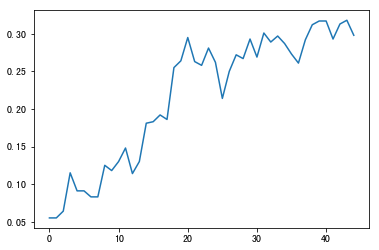

In [90]:
plt.plot(np.array(trade_loop_back.profit_array).cumsum())

In [91]:
trade_strategy2 = TradeStrategy2()
TradeStrategy2.set_keep_stock_threshold(20)
TradeStrategy2.set_buy_change_threshold(-0.08)

In [92]:
trade_loop_back = TradeLoopBack(trade_days, trade_strategy2)

In [93]:
trade_loop_back.execute_trade()

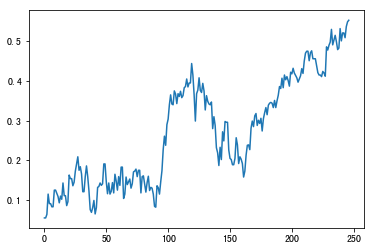

In [94]:
plt.plot(np.array(trade_loop_back.profit_array).cumsum())

In [95]:
for idx,e in enumerate(trade_days):
    if idx<10:print(e)

stock(date='2004-02-11 00:00:00', price=64.0, change=0)
stock(date='2004-02-12 00:00:00', price=64.5, change=0.008)
stock(date='2004-02-13 00:00:00', price=64.0, change=-0.008)
stock(date='2004-02-16 00:00:00', price=62.5, change=-0.023)
stock(date='2004-02-17 00:00:00', price=62.5, change=0.0)
stock(date='2004-02-18 00:00:00', price=63.0, change=0.008)
stock(date='2004-02-19 00:00:00', price=63.5, change=0.008)
stock(date='2004-02-20 00:00:00', price=63.5, change=0.0)
stock(date='2004-02-23 00:00:00', price=62.5, change=-0.016)
stock(date='2004-02-24 00:00:00', price=61.5, change=-0.016)


In [63]:
trade_days[]

stock(date='2017-12-27 00:00:00', price=225.0, change=-0.004)